# 02 - Data Preparation
* (1) 

In [10]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt
import utils
from constants import Constants

In [4]:
# Get a list of all accelerometer files
all_files = utils.get_all_files()

# Load one accelerometer data file into dataframe
load_id = 0     # Load the first CSV file from the file list 
file_id, df = utils.load_single_data(all_files, load_id)

# Setup paramters
fs = Constants.fs

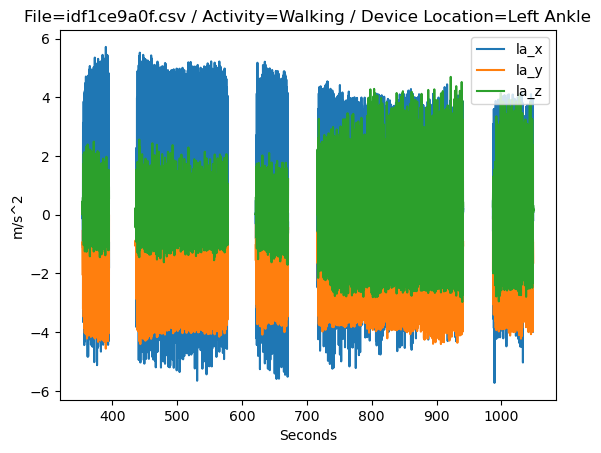

In [5]:
device_location = 'la'
activity = 1         # plot Activity=1 (Walking)

utils.plot_zoomin(file_id, df, activity, device_location)

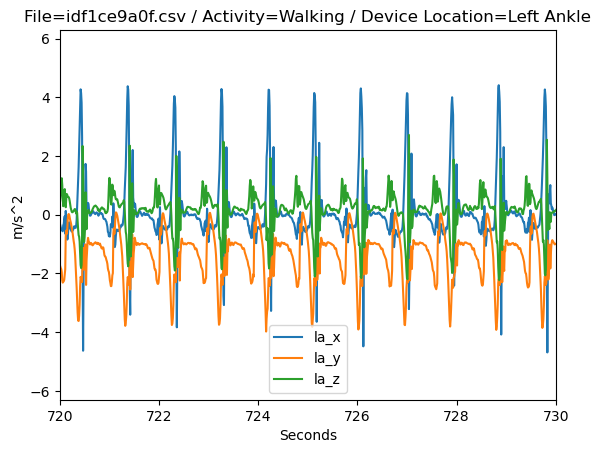

In [6]:
device_location = 'la'
activity = 1         # plot Activity=1 (Walking)
t0 = 720             # Define t_begin of the zoom-in
t1 = 730             # Define t_end of the zoom-in

utils.plot_zoomin(file_id, df, activity, device_location, t0, t1)

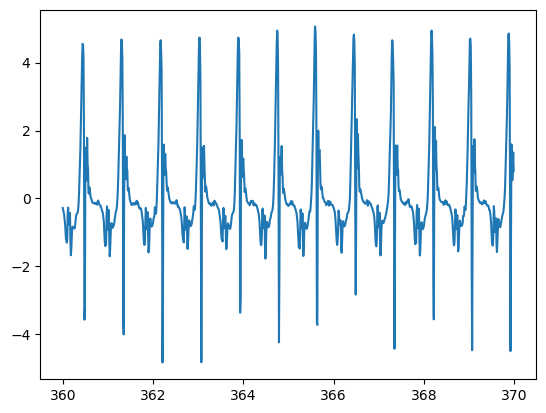

In [7]:
'''
Use frequency analysis to obtain steps counts
'''

# First prepare a 10-sec walking records from Left ankle
df2 = df[df.activity==1]                             # Select Walking data
df2_cut = df2[(df2.time_s>=360) & (df2.time_s<370)]  # Cut into a 10-sec segment  

# Apply FFT with Scipy

plt.plot(df2_cut.time_s, df2_cut.la_x)

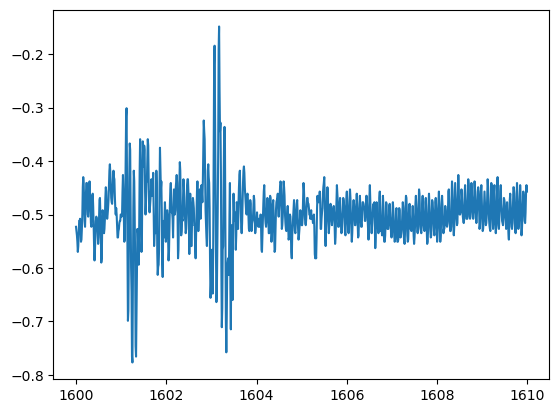

In [33]:
'''
Use frequency analysis to obtain steps counts
'''

def _spectra(signal_data, fs=fs):    
    # Compute the power spectral density using Welch's method
    frequencies, psd = signal.welch(signal_data, fs, nperseg=1024)

# First prepare a 10-sec walking records from Left ankle
df2 = df[df.activity==4]                             # Select Walking data
df2_cut = df2[(df2.time_s>=1600) & (df2.time_s<1610)]  # Cut into a 10-sec segment  

# Apply FFT with Scipy
plt.plot(df2_cut.time_s, df2_cut.la_x)

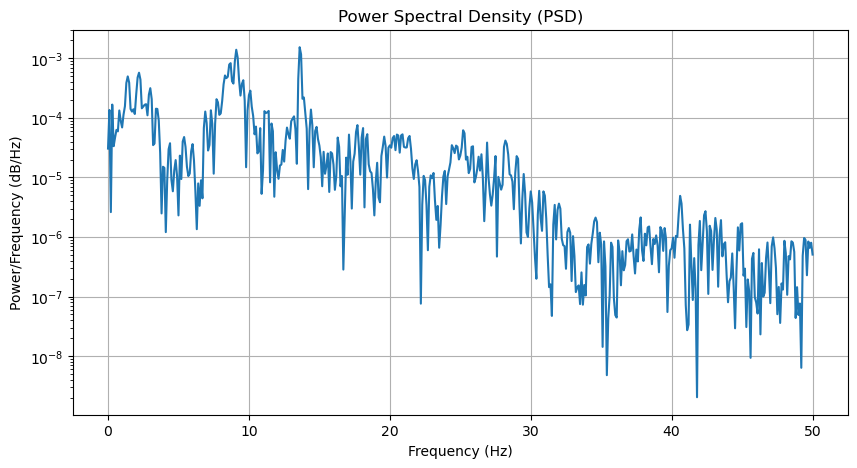

In [34]:

    
fs = 100
signal_data = df2_cut.la_x
frequencies, psd = signal.welch(signal_data, fs, nperseg=1024)

plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()

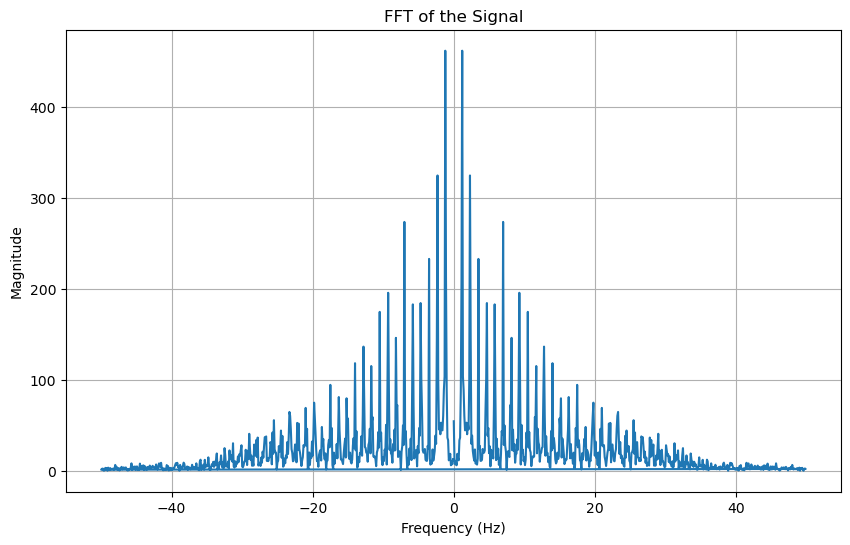

In [19]:
signal = df2_cut.la_x.values

fft_result = fft(signal)
freq = np.fft.fftfreq(len(signal), 1/fs)

plt.figure(figsize=(10, 6))
plt.plot(freq, np.abs(fft_result))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

/Users/kevinchao/anaconda3/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  warnings.warn('nperseg = {0:d} is greater than input length '


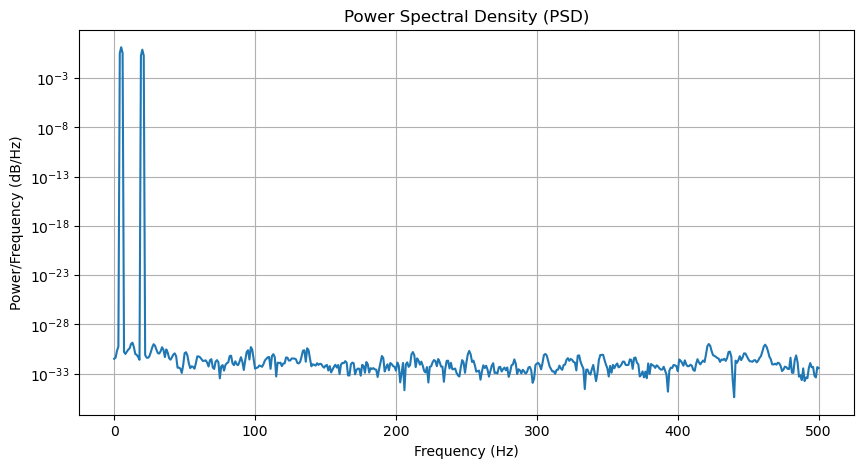

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a synthetic time series
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second with a step of 1/fs
f1, f2 = 5, 20  # Frequencies of the sinusoidal components
signal_data = 2 * np.sin(2 * np.pi * f1 * t) + 1.5 * np.sin(2 * np.pi * f2 * t)

# Compute the power spectral density using Welch's method
frequencies, psd = signal.welch(signal_data, fs, nperseg=1024)

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()


In [18]:
df2_cut

,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
35999,1,360.00,-0.320,-1.605,-0.711,0.211,-1.090,-0.188,-0.281,-1.406,0.246,0.441,1.336,-0.156
36000,1,360.01,-0.340,-1.586,-0.816,0.258,-1.039,-0.188,-0.344,-1.430,0.184,0.316,1.254,-0.188
36001,1,360.02,-0.371,-1.504,-0.910,0.285,-1.090,-0.219,-0.406,-1.449,0.117,0.305,1.121,-0.102
36002,1,360.03,-0.395,-1.414,-0.996,0.277,-1.242,-0.230,-0.473,-1.496,0.043,0.234,1.074,0.070
36003,1,360.04,-0.418,-1.402,-1.105,0.305,-1.398,-0.371,-0.621,-1.559,0.035,0.160,1.070,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36994,1,369.95,0.379,-1.035,0.207,0.465,-1.227,-0.414,1.434,-1.707,-0.508,-0.637,0.066,0.156
36995,1,369.96,0.340,-1.090,0.141,0.539,-1.039,-0.301,0.531,-1.133,-0.355,-0.688,0.223,0.051
36996,1,369.97,0.281,-1.172,0.082,0.625,-0.914,-0.125,0.895,-1.004,0.020,-0.699,0.391,-0.039
36997,1,369.98,0.246,-1.266,0.043,0.711,-0.855,-0.008,1.355,-1.078,2.027,-0.672,0.492,-0.129
